In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist
import mlflow
import mlflow.tensorflow

c:\Users\FFranci8\.virtualenvs\mflow-study-jnj-6ZsSCTUq\lib\site-packages\tensorflow\python\keras\engine\training_arrays_v1.py:37: UserWarning: A NumPy version >=1.23.5 and <2.5.0 is required for this version of SciPy (detected version 1.23.0)
  from scipy.sparse import issparse  # pylint: disable=g-import-not-at-top


Text(0.5, 1.0, '7')

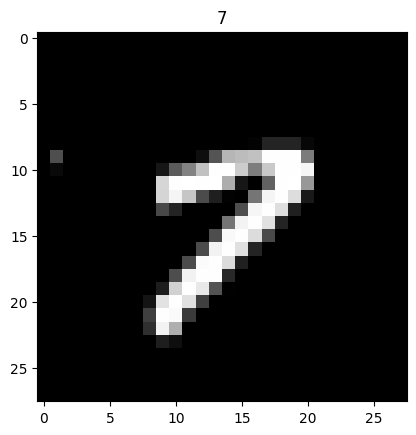

In [2]:
(X_treinamento, y_treinamento),(X_teste, y_teste) = mnist.load_data()
plt.imshow(X_treinamento[29],cmap='gray')
plt.title(y_treinamento[29])

In [3]:
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:]))) #transforma a matriz em um vetor
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:]))) #transforma a matriz em um vetor

In [4]:
X_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [5]:
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')
X_treinamento /= 255 #normalização
X_teste /= 255

In [6]:
y_treinamento = np_utils.to_categorical(y_treinamento,10) #gera 10 colunas de categoricos
y_teste = np_utils.to_categorical(y_teste,10)

In [7]:
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [8]:
def treina_dl(n_camadas_ocultas,n_units,activation,drop_out, epochs):
    global n
    n += 1
    mlflow.set_experiment("creditFirstExperimentSequential")
    
    with mlflow.start_run(run_name=f"Try:{n}"): #iterando para dar um nome diferente da tentativa 
        mlflow.tensorflow.autolog() #faz o log de tudo basicamente
        
        #registro de tags
        mlflow.set_tag("n_camadas_ocultas",n_camadas_ocultas)
        mlflow.set_tag("n_units",n_units)
        mlflow.set_tag("activation",activation)
        mlflow.set_tag("drop_out",drop_out)
        mlflow.set_tag("epochs",epochs)

    
        modelo = Sequential()
        
        #cria camada oculta mais camada de entrada
        modelo.add(Dense(units=n_units, activation=activation, input_dim=784)) #um neuronio pra cada pixel da imagem.
        modelo.add(Dropout(drop_out))
        
        #camadas ocultas adicionais, com drop out
        for n in range(n_camadas_ocultas):
            modelo.add(Dense(units=n_units, activation=activation))
            modelo.add(Dropout(drop_out))            
        
        #camada de saída
        modelo.add(Dense(units=10,activation='softmax')) #10 digitos que podem ser previstos ( 0 ate 9 )
        
        modelo.compile(optimizer='adam', loss="categorical_crossentropy",metrics=['accuracy'])
        
        modelo.summary()
        
        historico = modelo.fit(X_treinamento, y_treinamento, epochs =epochs, 
                              validation_data=(X_teste,y_teste))
        
        #grafico para erros e acuracia
        historico.history.keys()
        loss = plt.plot(historico.history['val_loss'])
        plt.savefig("png/loss.png")
        acuracia = plt.plot(historico.history['val_accuracy'])
        plt.savefig("png/acuracia.png")
        
        #registrar artefatos
        mlflow.log_artifact("png/loss.png")
        mlflow.log_artifact("png/acuracia.png")
       
        #informações de execução
        print("Modelo: ", mlflow.active_run().info.run_uuid)  
    mlflow.end_run()           
        

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                12560     
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================]

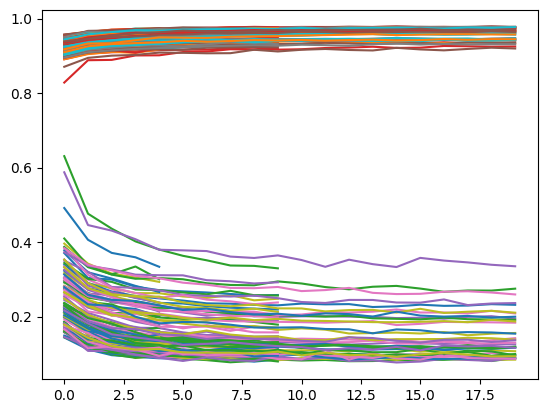

In [ ]:
n_camadas_ocultas = [1,2,3]
n_units = [16,32,64]
activation = ['relu','tanh']
drop_out = [0.1, 0.2]
epochs = [5,10,20]
n = 0
for camadas in n_camadas_ocultas:
    for unidades in n_units:
        for ativacao in activation:
            for drop in drop_out:
                for epocas in epochs:
                    #treina_dl(camadas,unidades,ativacao, drop, epocas)